In [1]:
import pandas as pd
import numpy as np
import os
import sys
import warnings

In [2]:
from matplotlib import pyplot as plt
import sklearn.linear_model

In [3]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [4]:
warnings.filterwarnings('ignore')

In [5]:
def show_images(X, y, row_ids, n_rows=3, n_cols=3):
    ''' Display images

    Args
    ----
    X : 2D array, shape (N, 784)
        Each row is a flat image vector for one example
    y : 1D array, shape (N,)
        Each row is label for one example
    row_ids : list of int
        Which rows of the dataset you want to display
    '''
    fig, axes = plt.subplots(
            nrows=n_rows, ncols=n_cols,
            figsize=(n_cols * 3, n_rows * 3))

    for ii, row_id in enumerate(row_ids):
        cur_ax = axes.flatten()[ii]
        cur_ax.imshow(X[row_id].reshape(28,28), interpolation='nearest', vmin=0, vmax=1, cmap='gray')
        cur_ax.set_xticks([])
        cur_ax.set_yticks([])
        cur_ax.set_title('y=%d' % y[row_id])

In [6]:
DATA_DIR = 'digit_data/'

In [7]:
x_tr_MF = np.loadtxt(os.path.join(DATA_DIR, 'x_train.csv'), delimiter=',', skiprows=1)
x_va_NF = np.loadtxt(os.path.join(DATA_DIR, 'x_valid.csv'), delimiter=',', skiprows=1)
x_te_PF = np.loadtxt(os.path.join(DATA_DIR, 'x_test.csv'), delimiter=',', skiprows=1)

In [8]:
y_tr_M = np.loadtxt(os.path.join(DATA_DIR, 'y_train.csv'), delimiter=',', skiprows=1)
y_va_N = np.loadtxt(os.path.join(DATA_DIR, 'y_valid.csv'), delimiter=',', skiprows=1)

In [9]:
def summarize_data(x_NF, y_N):
    N, F = x_NF.shape
    total_positive = np.sum(y_N)
    print('Total number of examples:', N)
    print('Number of positive examples:', total_positive)
    print('Fraction of positive examples: %.3f' % (total_positive/N))

## Table 1a

In [10]:
print('Training Data')
summarize_data(x_tr_MF, y_tr_M)
print()
print('Validation Data')
summarize_data(x_va_NF, y_va_N)

Training Data
Total number of examples: 9817
Number of positive examples: 4913.0
Fraction of positive examples: 0.500

Validation Data
Total number of examples: 1983
Number of positive examples: 1036.0
Fraction of positive examples: 0.522


In [11]:
iterations = np.asarray(range(40)) + 1
bce_tr = []
err_tr = []
bce_va = []
err_va = []

In [12]:
for i in iterations:
    lr = sklearn.linear_model.LogisticRegression(max_iter=i, solver='lbfgs', C=1e6)
    lr.fit(x_tr_MF, y_tr_M)
    
    yhat_tr_M = lr.predict(x_tr_MF)
    yhat_va_N = lr.predict(x_va_NF)
    
    bce_tr.append(sklearn.metrics.log_loss(y_tr_M, yhat_tr_M))
    bce_va.append(sklearn.metrics.log_loss(y_va_N, yhat_va_N))
    err_tr.append(sklearn.metrics.zero_one_loss(y_tr_M, yhat_tr_M))
    err_va.append(sklearn.metrics.zero_one_loss(y_va_N, yhat_va_N))

In [13]:
print(bce_va)

[9.806017100318781, 2.6126392513792163, 2.612640864283765, 2.2991278154115857, 1.8636898891080467, 1.3411579259256035, 1.2018184346702905, 1.166983158630325, 1.2714873738456725, 1.1844018047156508, 1.2366549203886679, 1.2540691309864838, 1.3063234563379125, 1.288906019930998, 1.3585765720109295, 1.602422294612276, 1.6198385213407782, 1.5850028420746756, 1.5501683724869846, 1.5327509360800704, 1.6198381181146408, 1.6720904273353832, 1.6720908305615205, 1.7243447526868116, 1.7591792222745029, 1.8114311282691082, 1.828848564676022, 1.8462664043090737, 1.8811020835751764, 1.9507714259766955, 1.9856079116950727, 1.9681904752881583, 1.9159369563890043, 1.950772635655107, 1.933353989569781, 1.9681892656097468, 1.9681888623836097, 2.0030249448758495, 2.0378602209158148, 2.0378602209158148]


Text(0.5, 0.98, 'Fig. 1b: Log Loss and Err vs Maximum Iterations')

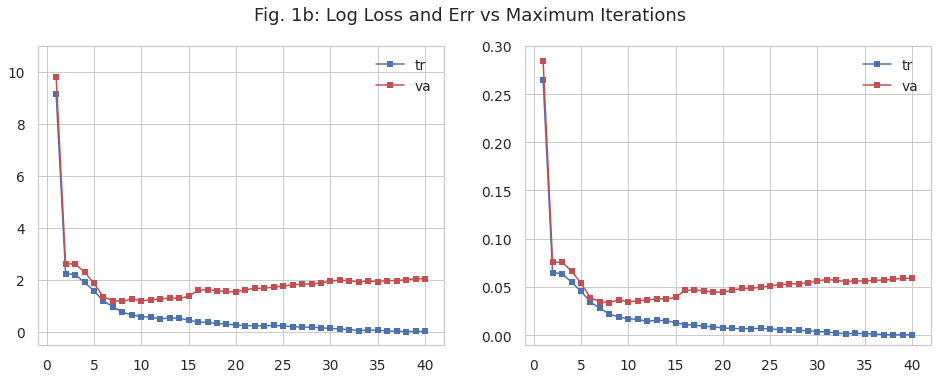

In [14]:
fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(16, 5.5))

plt.sca(ax_grid[0])
plt.plot(iterations, bce_tr, 'bs-', label='tr')
plt.plot(iterations, bce_va, 'rs-', label='va')
plt.legend(loc='upper right')
ax_grid[0].set_ylim([-0.5,11])

plt.sca(ax_grid[1])
plt.plot(iterations, err_tr, 'bs-', label='tr')
plt.plot(iterations, err_va, 'rs-', label='va')
ax_grid[1].set_ylim([-0.01, 0.3])
plt.legend(loc='upper right')

plt.suptitle('Fig. 1b: Log Loss and Err vs Maximum Iterations')

## Short Answer 1b:

We can see in these plots that for the training data set, increasing the max iterations leads, in general, to lower error, both in terms of log loss and zero one error. However, the validation set does not follow this trend, as the lowest errors in both metrics were achieved at iteration 7. *FIX THIS IN FINAL* C is the inverse of regularization strength, so having a high C leads to a lower regularization strength. Regularization strength is a penalty on high weights, which can be an indicator of overfit, as the model is not penalized as much for having weights. Given the high value of C, we can conclude that the divergence in errors occurs due to overfit.

In [19]:
c_grid  = np.logspace(-9, 6, 31)

In [22]:
err_tr = []
err_va = []

for C in c_grid:
    lr = sklearn.linear_model.LogisticRegression(max_iter=1000, solver='lbfgs', C=C)
    lr.fit(x_tr_MF, y_tr_M)
    
    yhat_tr_M = lr.predict(x_tr_MF)
    yhat_va_N = lr.predict(x_va_NF)
    
    err_tr.append(sklearn.metrics.zero_one_loss(y_tr_M, yhat_tr_M))
    err_va.append(sklearn.metrics.zero_one_loss(y_va_N, yhat_va_N))

Text(0.5, 0.98, 'Fig. 1c: Error vs C')

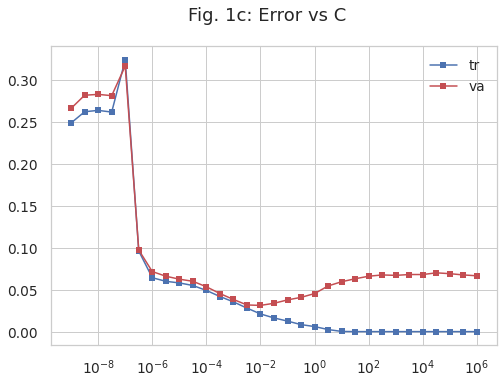

In [80]:
plt.plot(c_grid, err_tr, 'bs-', label='tr')
plt.plot(c_grid, err_va, 'rs-', label='va')
plt.xscale('log')
plt.legend(loc='upper right')
plt.suptitle('Fig. 1c: Error vs C')

In [76]:
best_c = c_grid[np.argmin(err_va)]
print('best C:', best_c)

best C: 0.01


In [97]:
best_c_lr = sklearn.linear_model.LogisticRegression(max_iter=1000, solver='lbfgs', C=best_c)

best_c_lr.fit(x_tr_MF, y_tr_M)
yhat_va_N = lr.predict(x_va_NF)

In [108]:
FP = np.bitwise_and(np.invert(y_va_N.astype(int)), yhat_va_N.astype(int))
FN = np.bitwise_and(y_va_N.astype(int), np.invert(yhat_va_N.astype(int)))

selected_FP = np.random.choice(FP.nonzero()[0], size=9, replace=False)
selected_FN = np.random.choice(FN.nonzero()[0], size=9, replace=False)

Text(0.5, 0.98, 'Fig. 1d: False Positives and False Negatives')

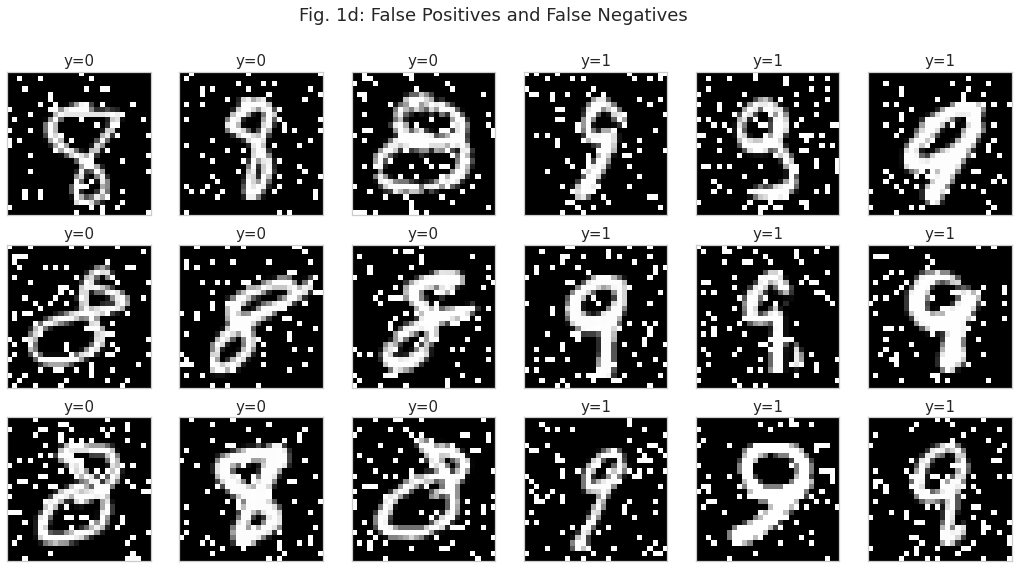

In [109]:
fig, axes = plt.subplots(
        nrows=3, ncols=6,
        figsize=(6 * 3, 3 * 3))

for i in range(18):
    cur_ax = axes.flatten()[i]
    
    im = None
    
    row = int(i / 6)
    col = i % 6
    
    index = col - row * 3
    
    if col < 3:
        im = x_va_NF[selected_FP[index]].reshape(28,28)
    else:
        index -= 3
        im = x_va_NF[selected_FN[index]].reshape(28,28)
        
    cur_ax.imshow(im, vmin=0, vmax=1, cmap='gray')
    cur_ax.set_xticks([])
    cur_ax.set_yticks([])
    cur_ax.set_title('y=%d' % int(col >= 3))
    
plt.suptitle('Fig. 1d: False Positives and False Negatives')

## Short Answer 1d: Analysis of Classifier Mistakes

Text(0.5, 0.98, 'Fig. 1e: Coefficients')

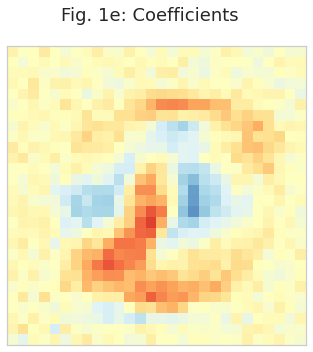

In [111]:
best_c_weights = best_c_lr.coef_.reshape(28,28)
plt.imshow(best_c_weights, vmin=-0.5, vmax=0.5, cmap='RdYlBu')
plt.tick_params(axis='both', which='both', labelleft=False, labelbottom=False)
plt.grid(False)
plt.suptitle('Fig. 1e: Coefficients')

## Short Asnwer 1e: Analysis of Coefficients
